# Clean

Examples of some common data-cleaning tasks:

- import a custom module
- normalize numerical columns
- do [principal component analysis]

[principal component analysis]: https://en.wikipedia.org/wiki/Principal_component_analysis

In [1]:
%load_ext autoreload
%autoreload 2

import numpy
import seaborn
import sklearn.decomposition

from tools import *

## get an [iris dataset] from `sklearn.datasets`

[iris dataset]: https://en.wikipedia.org/wiki/Iris_flower_data_set

In [2]:
data = irisdata()
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


## separate features from target columns

In [4]:
feats = data[data.columns.drop('species')]
afew(feats)

,sepal_length,sepal_width,petal_length,petal_width
144,6.7,3.3,5.7,2.5
90,5.5,2.6,4.4,1.2
125,7.2,3.2,6.0,1.8
33,5.5,4.2,1.4,0.2
91,6.1,3.0,4.6,1.4


In [5]:
target = data['species']
afew(target)

111     virginica
79     versicolor
25         setosa
35         setosa
30         setosa
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

## look for patterns

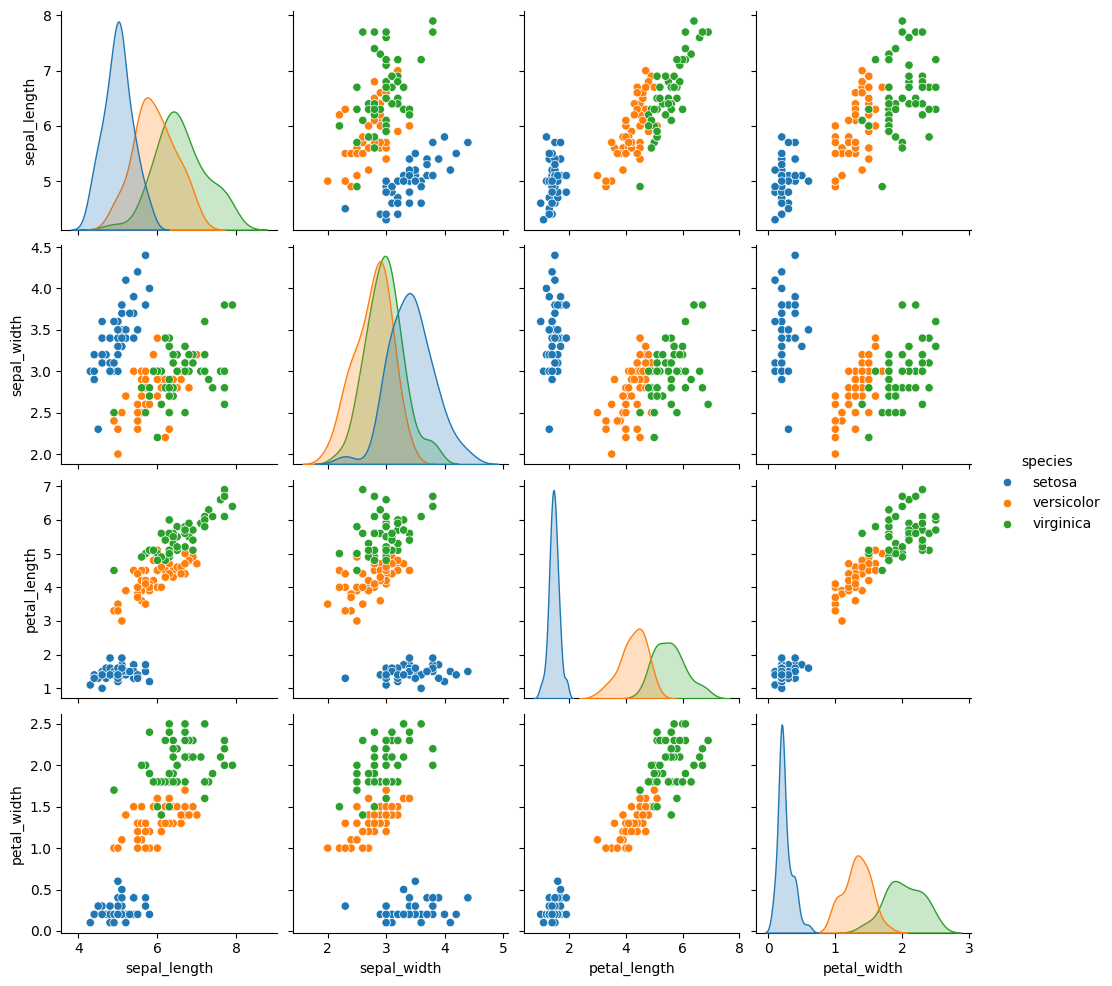

In [6]:
seaborn.pairplot(feats.join(target), hue=target.name)

## normalize features (mean 0, variance 1)

In [7]:
zfeats = zscores(feats)
zfeats.mean()

sepal_length   -4.736952e-16
sepal_width    -7.815970e-16
petal_length   -2.368476e-16
petal_width    -3.315866e-16
dtype: float64

In [8]:
zfeats.std()

sepal_length    1.0
sepal_width     1.0
petal_length    1.0
petal_width     1.0
dtype: float64

## normalize features (median 0, median absolute deviation 1)

In [9]:
mfeats = zscores(feats, robust=True)
mfeats.median()

sepal_length    0.000000e+00
sepal_width     0.000000e+00
petal_length    2.983724e-16
petal_width     0.000000e+00
dtype: float64

In [10]:
mfeats.abs().mean()

sepal_length    1.0
sepal_width     1.0
petal_length    1.0
petal_width     1.0
dtype: float64

## find principal components

Create a 2-column simplified dataset from the original 4 columns.

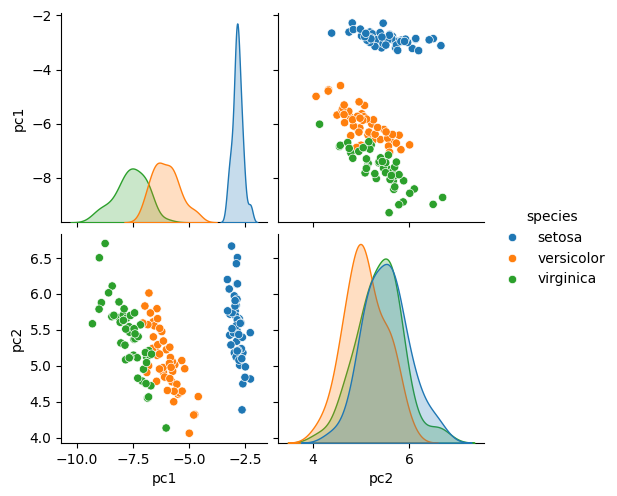

In [11]:
# Use the *last* 2 eigenvectors of the sample covariance matrix.
_, evecs = numpy.linalg.eigh(numpy.cov(feats.T))
pcdata = feats @ evecs[:, -1:-3:-1]
pcdata.columns = ['pc1', 'pc2']

seaborn.pairplot(pcdata.join(target), hue=target.name)

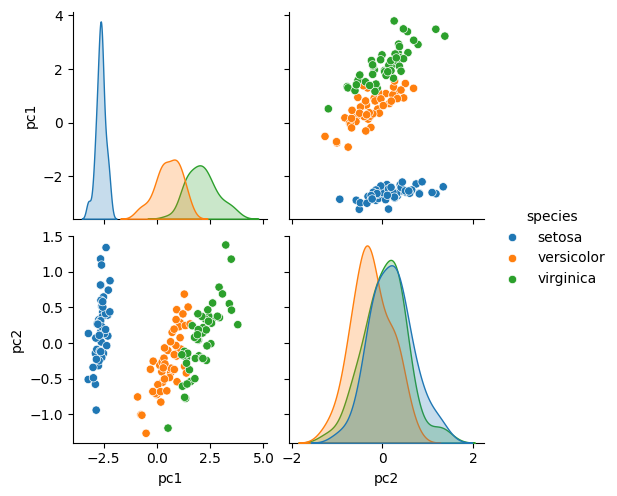

In [12]:
# ... or let scikit-learn do all the work
skdata = sklearn.decomposition.PCA(2).fit_transform(feats)
skdata = DataFrame(skdata, columns=['pc1','pc2'])

seaborn.pairplot(skdata.join(target), hue=target.name)